# Beer Dataset statistics



##Exploring the dataset and giving some relevant informations
1. Top Most rewewed beers (Plot Graph)
2. The most active drinker (Plot Graph)
3. The stronghest beers (ABV) (Plot Graph)
4. Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?
5. How sparse is tour data ?
6. Null Value
7. Duplicates


In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install pyspark
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 43 kB/s 
     |████████████████████████████████| 199 kB 43.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=776862a8acc3af7c72e2a0eeac286ea1ecc3b945ba299b277674e14292f350da
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create the session
conf = SparkConf().set("spark.ui.port", "4050").set('spark.executor.memory', '4G').set('spark.driver.memory', '45G').set('spark.driver.maxResultSize', '10G')

# Create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
spark = SparkSession.builder.appName("Raccomandation").getOrCreate()
data = spark.read.csv("/content/drive/MyDrive/UNIVERSITA/BIG DATA/BIG DATA /beer_reviews.csv",inferSchema= True,header = True)

In [ ]:
data.describe().show()

+-------+------------------+--------------------+--------------------+------------------+------------------+------------------+--------------------+----------+------------------+------------------+------------------------+------------------+-----------------+
|summary|        brewery_id|        brewery_name|         review_time|    review_overall|      review_aroma| review_appearance|  review_profilename|beer_style|     review_palate|      review_taste|               beer_name|          beer_abv|      beer_beerid|
+-------+------------------+--------------------+--------------------+------------------+------------------+------------------+--------------------+----------+------------------+------------------+------------------------+------------------+-----------------+
|  count|           1586614|             1586599|             1586614|           1586614|           1586614|           1586614|             1586266|   1586614|           1586614|           1586614|                 158661

# Percentage of duplicated reviews 

In [ ]:
dropDisDF = data.dropDuplicates(["review_profilename","beer_beerid"])
print("Distinct count of users who rates a beer  : "+str(dropDisDF.count()))
print( "percentage of duplicated is equal to " + str(((data.count()-dropDisDF.count())/data.count()))+ "%")

Distinct count of users who rates a beer  : 1571808
percentage of duplicated is equal to 0.009331822358809388%


#Top 10 Most rated Beers

In [ ]:
data2 = data.orderBy(col("review_aroma").desc(),col("review_appearance").desc(),col("review_palate").desc(),col("review_taste").desc(),col("review_overall").desc())

In [ ]:
reviews = data2.select("beer_beerid","beer_name","review_aroma","review_appearance","review_palate","review_taste")

reviews.select("beer_beerid","beer_name","review_aroma","review_appearance","review_palate","review_taste").show(10)

+-----------+--------------------+------------+-----------------+-------------+------------+
|beer_beerid|           beer_name|review_aroma|review_appearance|review_palate|review_taste|
+-----------+--------------------+------------+-----------------+-------------+------------+
|      57110|D.O.R.I.S. The De...|         5.0|              5.0|          5.0|         5.0|
|      57172|The Worthy Adversary|         5.0|              5.0|          5.0|         5.0|
|      57110|D.O.R.I.S. The De...|         5.0|              5.0|          5.0|         5.0|
|      57110|D.O.R.I.S. The De...|         5.0|              5.0|          5.0|         5.0|
|      57110|D.O.R.I.S. The De...|         5.0|              5.0|          5.0|         5.0|
|      10784|         Caldera IPA|         5.0|              5.0|          5.0|         5.0|
|      47695|Barrel Aged B.O.R...|         5.0|              5.0|          5.0|         5.0|
|      57110|D.O.R.I.S. The De...|         5.0|              5.0|     

 # Most Common rate by Community 
In this cell I'm plotting a bargraph about most common rate

In [ ]:
reviews = data.toPandas()

In [ ]:
sns.set_style("darkgrid")
sns.set_context("notebook", rc={"lines.linewidth": 2, 
                                "xtick.labelsize":14, 
                                "ytick.labelsize":14,
                                "axes.labelsize": 18,
                                "axes.titlesize": 20,
                                })

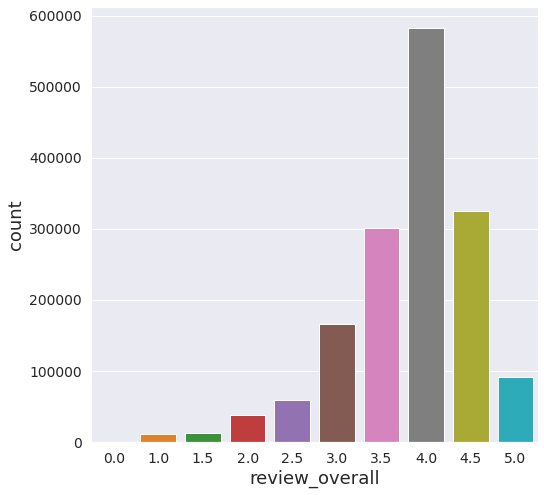

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax = sns.countplot(x="review_overall", data = reviews)

#What are the top 10 most popular beers ?
In this cell I'm plotting a bargraph about most popular (reviewed) beers


In [ ]:
ok = data.groupBy("beer_name").count().orderBy(col("beer_name"))
data2 = ok.sort(col("count").desc())
display_data = data2.limit(5)
display_data.show()
review_statistics = display_data.toPandas() 

+--------------------+-----+
|           beer_name|count|
+--------------------+-----+
|       90 Minute IPA| 3290|
|      India Pale Ale| 3130|
|Old Rasputin Russ...| 3111|
|Sierra Nevada Cel...| 3000|
|     Two Hearted Ale| 2728|
+--------------------+-----+



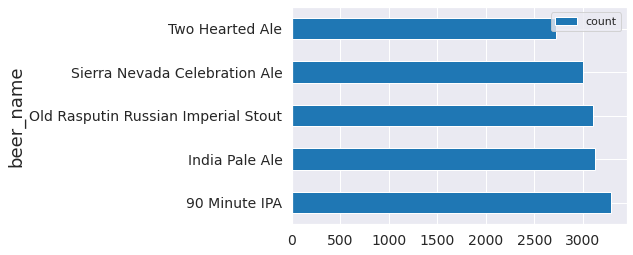

In [ ]:
review_statistics.plot.barh(x='beer_name', y='count')  

#What are the most active drinker ? 
the most active means the people who make the most elevated number of reviews

In [ ]:
drinker = data.groupBy("review_profilename").count().orderBy(col("review_profilename"))
data2 = drinker.sort(col("count").desc())
display_data = data2.limit(5)
display_data.show()

+------------------+-----+
|review_profilename|count|
+------------------+-----+
|    northyorksammy| 5817|
|     BuckeyeNation| 4661|
|       mikesgroove| 4617|
|         Thorpe429| 3518|
|     womencantsail| 3497|
+------------------+-----+



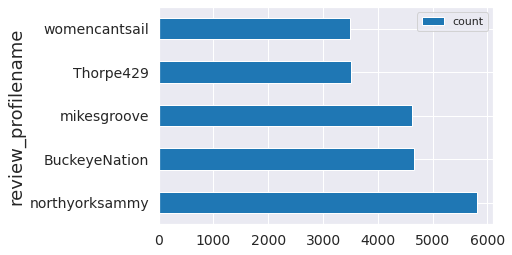

In [ ]:
pd_dataframe = display_data.toPandas()
pd_dataframe.plot.barh(x='review_profilename', y='count')  

# What are the stronghest beers (ABV) ? 
I'm plotting the bargraph about the most strongest beers.

ABV measure the alcool contained in a specific beer.


In [ ]:
reviews = data.toPandas()

In [ ]:

import plotly.graph_objs as go
import plotly as py

In [ ]:
top_10_abv = reviews[['beer_name','brewery_name','beer_abv']].sort_values('beer_abv', ascending=False).drop_duplicates('beer_name').head(10).sort_values('beer_abv', ascending=True)

In [ ]:
p = [go.Bar(x = top_10_abv['beer_abv'] ,
            y = top_10_abv['beer_name'],
            hoverinfo = 'x',
            text=top_10_abv['beer_name'],
            textposition = 'inside',
            orientation = 'h',
            opacity=0.7, 
            marker=dict(
                color='rgb(1, 87, 155)'))]


layout = go.Layout(title='Top 10 Strongest Beers by ABV',
                   xaxis=dict(title="ABV",
                              tickformat = "",
                              hoverformat = ''),
                   margin = dict(l = 220),
                   font=dict(family='Courier New, monospace',
                            color='dark gray'))

fig = go.Figure(data=p, layout=layout)
py.offline.iplot(fig)

##A little overview of numeric features 

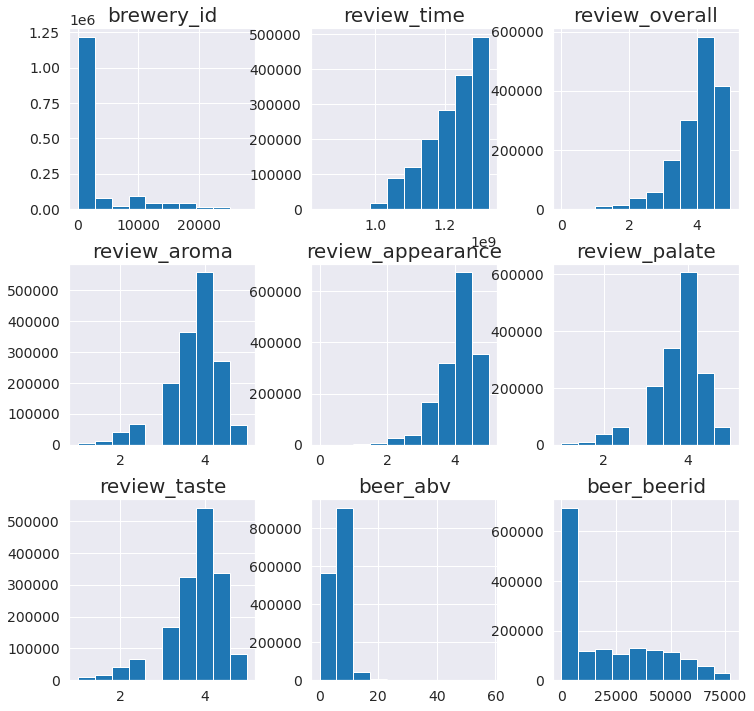

In [ ]:
reviews.hist(figsize=(12,12))
plt.show()



# Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?


I have to analise the 4 different reviews and it's correlations with correlation matrix and its respective plot
A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.


In [ ]:
cmatrix = data.toPandas()

In [ ]:
factors = ["review_appearance","review_aroma","review_palate","review_taste", "review_overall"]
corr_metrics = cmatrix[factors].corr()
#corr_metrics.style.background_gradient(cmap='Blues')
corr_metrics
corr_metrics.style.background_gradient(cmap='Oranges')

,review_appearance,review_aroma,review_palate,review_taste,review_overall
review_appearance,1.000000,0.561029,0.566634,0.546980,0.501732
review_aroma,0.561029,1.000000,0.616947,0.716776,0.616013
review_palate,0.566634,0.616947,1.000000,0.734135,0.701914
review_taste,0.546980,0.716776,0.734135,1.000000,0.789816
review_overall,0.501732,0.616013,0.701914,0.789816,1.000000


In [ ]:
correlation = cmatrix["review_overall"].corr(cmatrix["review_palate"])
print("review_palate",correlation )

correlation1 = cmatrix["review_overall"].corr(cmatrix["review_aroma"])
print("review_aroma",correlation1 )

correlation2 = cmatrix["review_overall"].corr(cmatrix["review_taste"])
print("review_taste",correlation2 )

correlation3 = cmatrix["review_overall"].corr(cmatrix["review_appearance"])
print("review_appearance",correlation3 )


review_palate 0.701913935876308
review_aroma 0.6160131181957844
review_taste 0.7898156397730296
review_appearance 0.5017324025451658


So the most correlated values is "taste" with (0.789)

As I supposed taste is the most important factors in the chooice of a beer

# Preprocessing

## Duplicate Analisis 
* Percentage of duplicates 
* dropping rows duplicated


In [ ]:
data.show()

+----------+--------------------+-----------+--------------+------------+-----------------+------------------+--------------------+-------------+------------+--------------------+--------+-----------+
|brewery_id|        brewery_name|review_time|review_overall|review_aroma|review_appearance|review_profilename|          beer_style|review_palate|review_taste|           beer_name|beer_abv|beer_beerid|
+----------+--------------------+-----------+--------------+------------+-----------------+------------------+--------------------+-------------+------------+--------------------+--------+-----------+
|     10325|     Vecchio Birraio| 1234817823|           1.5|         2.0|              2.5|           stcules|          Hefeweizen|          1.5|         1.5|        Sausa Weizen|     5.0|      47986|
|     10325|     Vecchio Birraio| 1235915097|           3.0|         2.5|              3.0|           stcules|  English Strong Ale|          3.0|         3.0|            Red Moon|     6.2|      48

In [ ]:
dropDisDF = data.dropDuplicates(["review_profilename","beer_beerid"])
print("Distinct count of users who rates a beer  : "+str(dropDisDF.count()))


Distinct count of users who rates a beer  : 1571808


In [ ]:
print( "percentage of duplicated is equal to " + str(((data.count()-dropDisDF.count())/data.count())))

percentage of duplicated is equal to 0.009331822358809388


##Percentage of  Null Values 

In [ ]:
print(data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]).show())

+----------+------------+-----------+--------------+------------+-----------------+------------------+----------+-------------+------------+---------+--------+-----------+
|brewery_id|brewery_name|review_time|review_overall|review_aroma|review_appearance|review_profilename|beer_style|review_palate|review_taste|beer_name|beer_abv|beer_beerid|
+----------+------------+-----------+--------------+------------+-----------------+------------------+----------+-------------+------------+---------+--------+-----------+
|         0|          15|          0|             0|           0|                0|               348|         0|            0|           0|        0|   67785|          0|
+----------+------------+-----------+--------------+------------+-----------------+------------------+----------+-------------+------------+---------+--------+-----------+

None


In [ ]:
data_na = data.na.drop()

Percentage of null rows in dataset 

In [ ]:
diff = data.count()- data_na.count() 
print ("percentage of na values are : " +str(float((diff/(data.count())))) +""+"%")

percentage of na values are : 0.042944282604338545%


In [ ]:
numerator = data_na.select("review_overall").count()

# Count the number of distinct user_ids and distinct beer_ids
num_users = data_na.select("review_profilename").distinct().count()
num_beers = data_na.select("beer_beerid").distinct().count()

# Set the denominator equal to the number of users multiplied by the number of beers
denominator = num_users * num_beers

# Divide the numerator by the denominator
sparsity = (1.0 - (numerator *1.0)/denominator)*100
print ("The beer_tbl dataframe is", "%.2f" % sparsity + "% empty.")

The beer_tbl dataframe is 99.91% empty.


##Bibliography
[Beer Reviews](https://www.kaggle.com/code/joonim/beer-reviews-asking-questions/notebook)